# EDA/ sanity check 
Check on the constructed enron network to determine if the graph is a good use case

## observations.
- took 2 traders with a big difference in the embedding space ('scott-s', 'bass-e'). Both has node features that fit kind of in the trader range, i.e. not a reason to be an extreme value for trader. 
- I've looked at the number of edges in the core graph for scott, which were 52 in the core graph and 934 in the total graph, but top 10 weight only contained 1 core edge. SCott send in total 1701 mails to 3549 recipients to 934 distinct email addressess.
= bass-e has 1680 mails sent 3258 recipients and 229 distinct email addresses of which 15 where core.
- kijkend naar welke type rollen ze communiceren dan zie je dat scott vooral naar director and vice president communiceert and bass naar manager.

In [1]:
# run this only once!!
import os
os. chdir("../..")
os.getcwd()

'/Users/tonpoppe/workspace/graphcase_experiments/graphcase_experiments'

In [2]:
import networkx as nx
from graphcase_experiments.algos.GraphCaseWrapper import GraphCaseWrapper
from graphcase_experiments.tools.embedding_plotter import plot_embedding2, plotly_embedding, plot_graph
from graphcase_experiments.tools.calculate_embed import calculate_graphcase_embedding
import matplotlib.pyplot as plt
import pydot
import contextlib

/Users/tonpoppe/opt/anaconda3/envs/graphcase/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# load graph
SOURCE_PATH = 'graphcase_experiments/graphs/enron/data/'
G = nx.read_gpickle(SOURCE_PATH + 'enron_sub_graph.pickle')

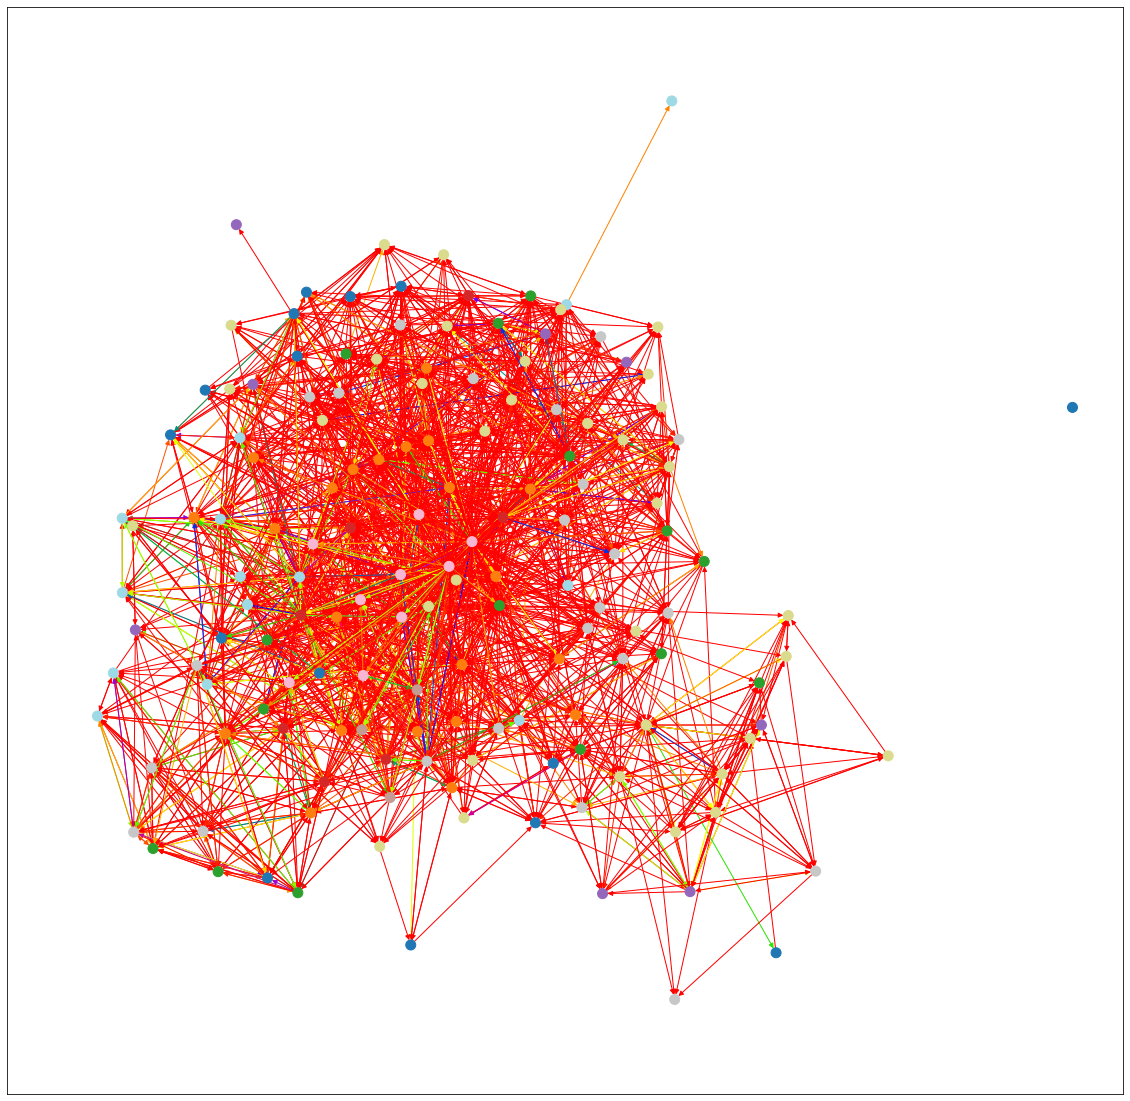

In [5]:
plot_graph(G)

In [4]:
algo = GraphCaseWrapper
with open(os.devnull, 'w') as devnull:
    with contextlib.redirect_stdout(devnull):
        _, tbl_gc = calculate_graphcase_embedding(
            G, algo.LOCATION, params=algo.COMP_PARAMS, verbose=False, algo=algo
        )
plotly_embedding(tbl_gc)

2022-07-04 10:51:31.698620: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-04 10:52:32.960331: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/Users/tonpoppe/workspace/graphcase_experiments/graphcase_experiments/graphcase_experiments/tools/embedding_plotter.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  embed_df['embed1'] = embed[:,0]
/Users/tonpoppe/workspace/graphcas

In [10]:

print(G.nodes(data='old_id')[7]

'scott-s'

name of person is scott-s


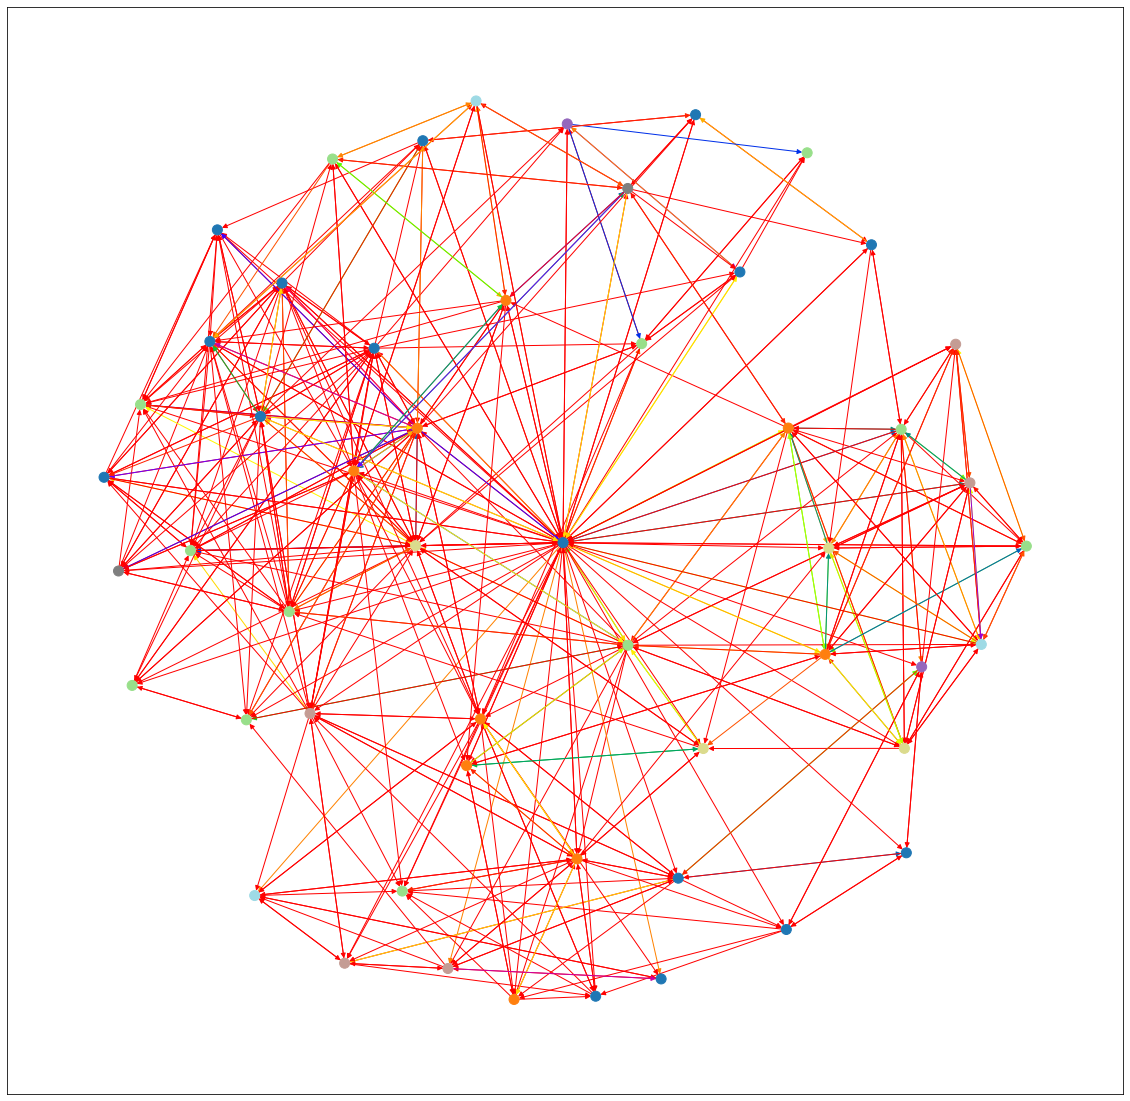

In [11]:
# get subgraph
person_id = 7
print(f"name of person is {G.nodes(data='old_id')[person_id]}")
neighbors = list(G.neighbors(person_id)) + [person_id]
g_person = G.subgraph(neighbors)
plot_graph(g_person)


name of person is bass-e


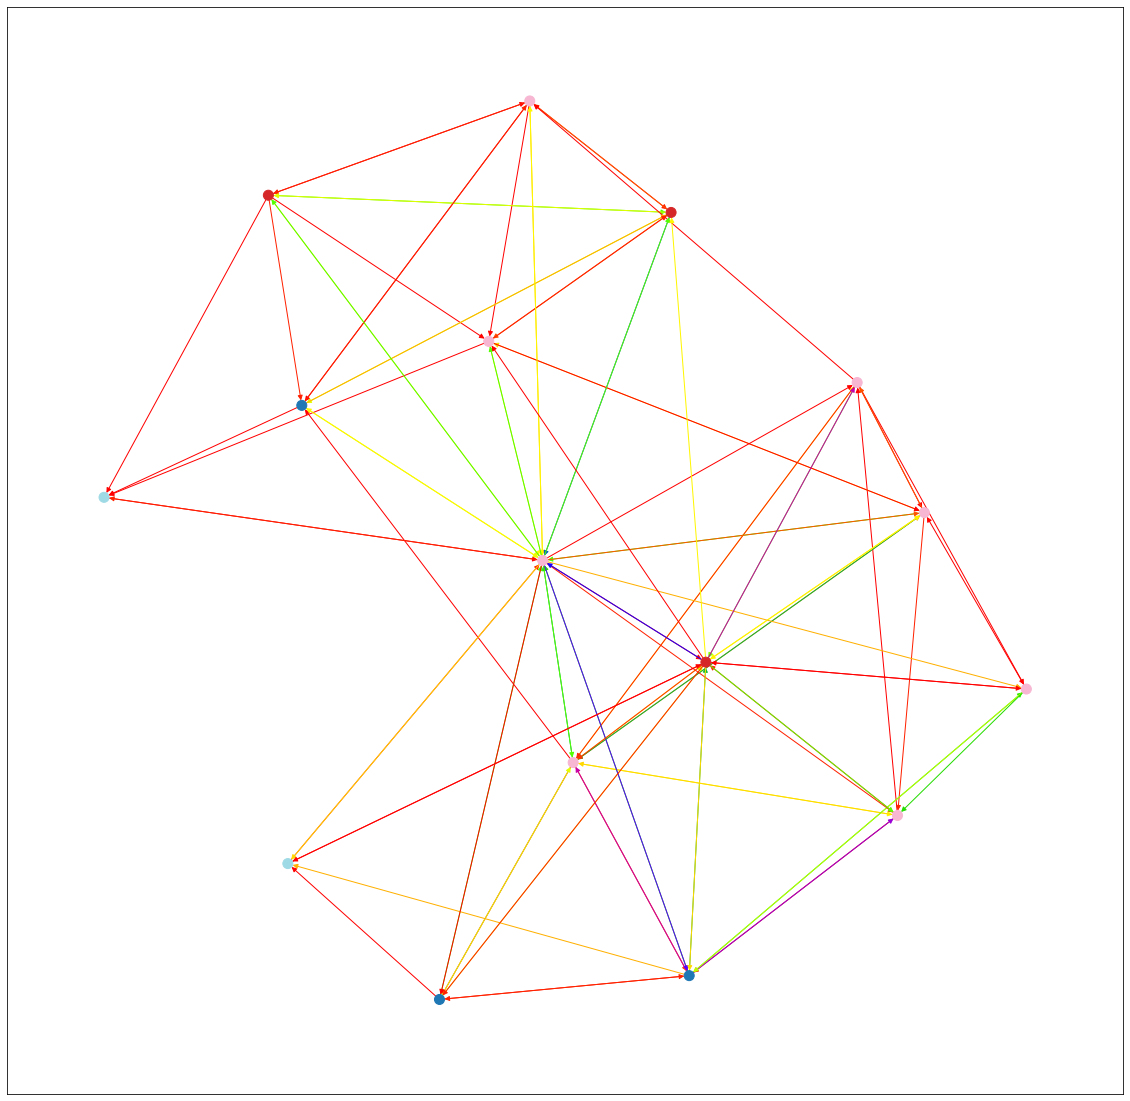

In [12]:
person_id = 91
print(f"name of person is {G.nodes(data='old_id')[person_id]}")
neighbors = list(G.neighbors(person_id)) + [person_id]
g_person = G.subgraph(neighbors)
plot_graph(g_person)

In [17]:
tmp_path = '/Users/tonpoppe/Downloads/'
# enron.email.write.format('parquet').save(tmp_path + 'enron_email')
email = spark.read.format('parquet').load(tmp_path + 'enron_email')

In [7]:

G.nodes[91]

{'attr_received_size': 0.06141130017829527,
 'attr_cnt_to': 0.15414444983034414,
 'attr_cnt_cc': 0.022717049032838506,
 'attr_sent_size': 0.16311079372254517,
 'attr_cnt_send': 0.836616401062213,
 'label': 'trader',
 'old_id': 'bass-e'}

In [11]:
# get 7 most important edges of the node
import pandas as pd 
n =7
weights = [(s,t,w) for s,t,w in G.edges(n, data='weight')]
pdf = pd.DataFrame(weights)
pdf.sort_values(2, )
